<a href="https://colab.research.google.com/github/Chinmay2808/Project/blob/main/Exploratory_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
path="/content/drive/MyDrive/Diwali Sales Data.csv"

df=pd.read_csv(path,encoding='unicode_escape')
df.shape

(11251, 15)

In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
df.drop(['Status','unnamed1'], axis=1 ,inplace=True)

In [13]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [14]:
df.dropna(inplace=True)

In [19]:
df['Amount']=df['Amount'].astype('int')

In [20]:
df['Amount'].dtype

dtype('int64')

In [23]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [24]:
df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [ ]:
df.describe()

In [29]:
df[['Amount','Age','Orders']].describe()

,Amount,Age,Orders
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,35.410357,2.489634
std,5222.355168,12.753866,1.114967
min,188.000000,12.000000,1.000000
25%,5443.000000,27.000000,2.000000
50%,8109.000000,33.000000,2.000000
75%,12675.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


**Exploratory data Analysis**

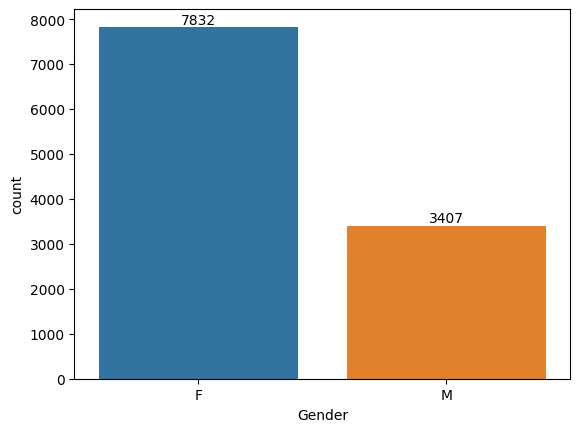

In [31]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
  ax.bar_label(bars)

In [35]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

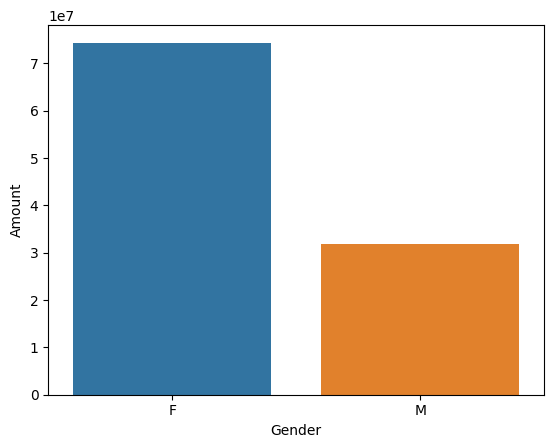

In [38]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data=sales_gen)

*From the above graph we can see that females are the major buyers and they have greater purchasing power*

**Age**

In [41]:
df.columns



Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

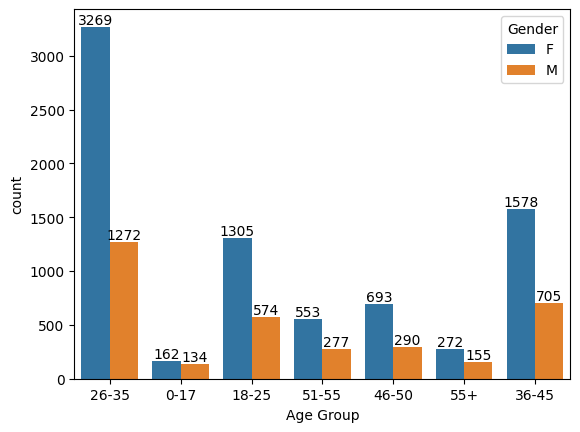

In [45]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

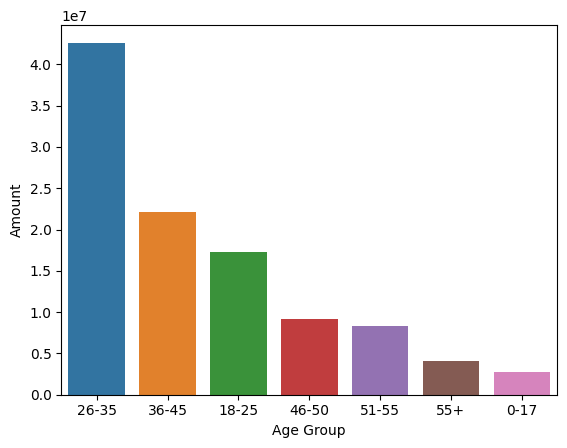

In [46]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data=sales_age)

*From the above graph we can see the most of the buyers are of age group between 26-35 years female.*

**Sates**

In [49]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

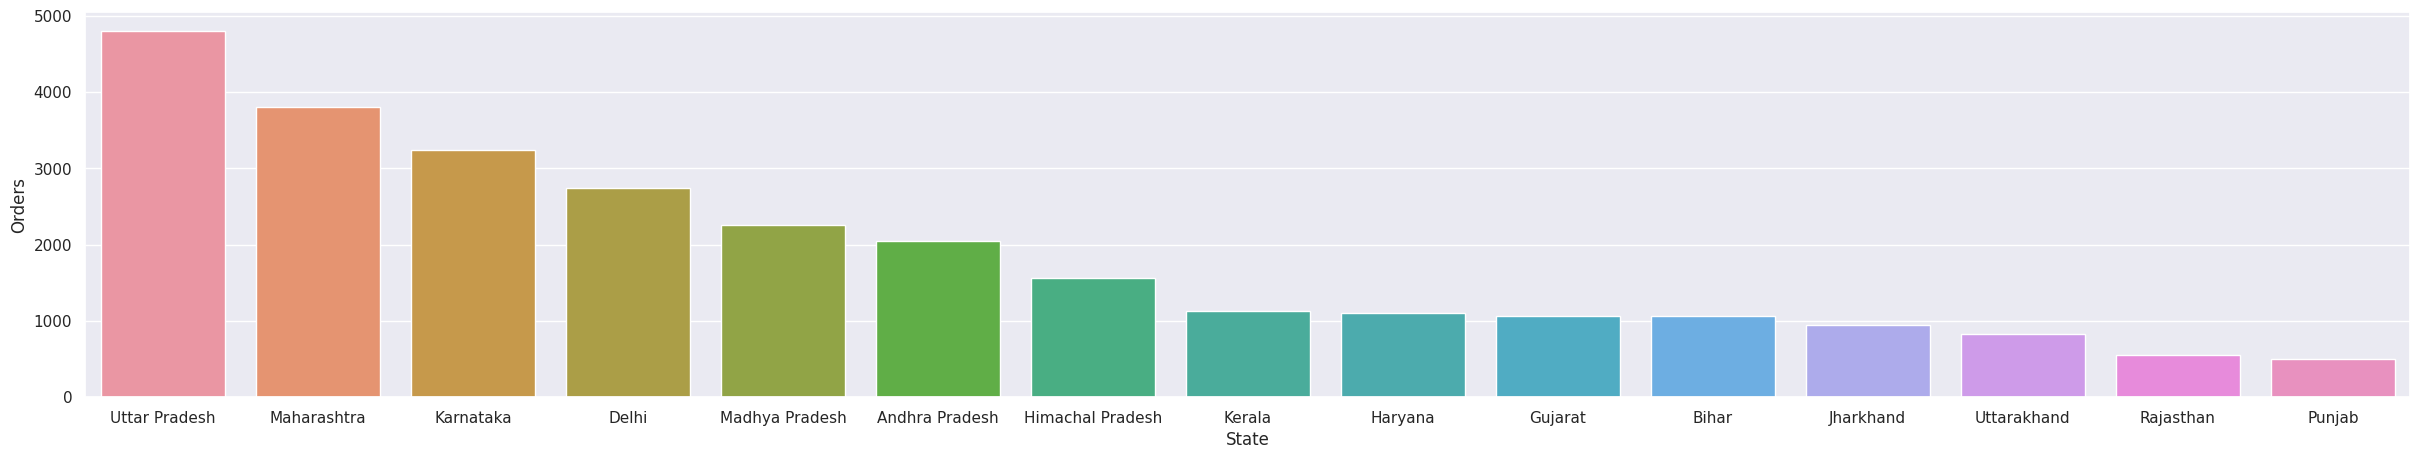

In [59]:
sales_states=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(15)

sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data=sales_states,x='State',y='Orders')

**From the above graph we can see that most of the orders are from Uttar Prades, Maharshtra, Karnataka respectively. **

**Marital Status**

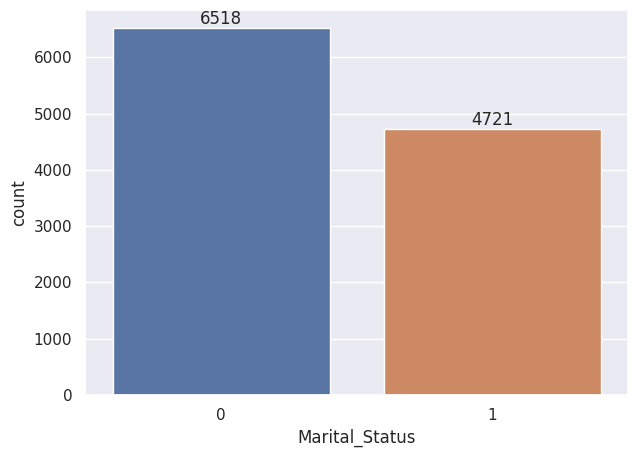

In [63]:
ax= sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

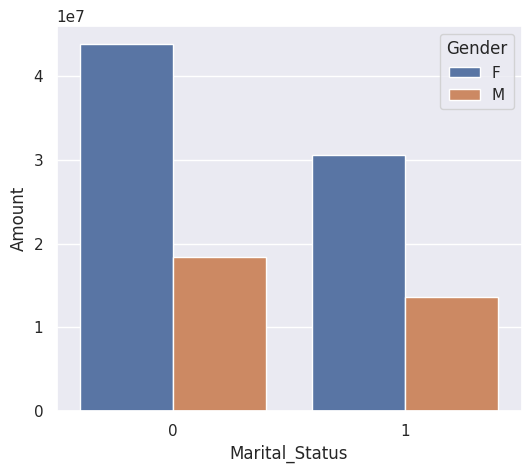

In [65]:
sales_states=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(15)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_states,x='Marital_Status',y='Amount', hue='Gender')

***From the above graph we can see that most buyers are married women and they have high purchasing power.***

**Occupation**

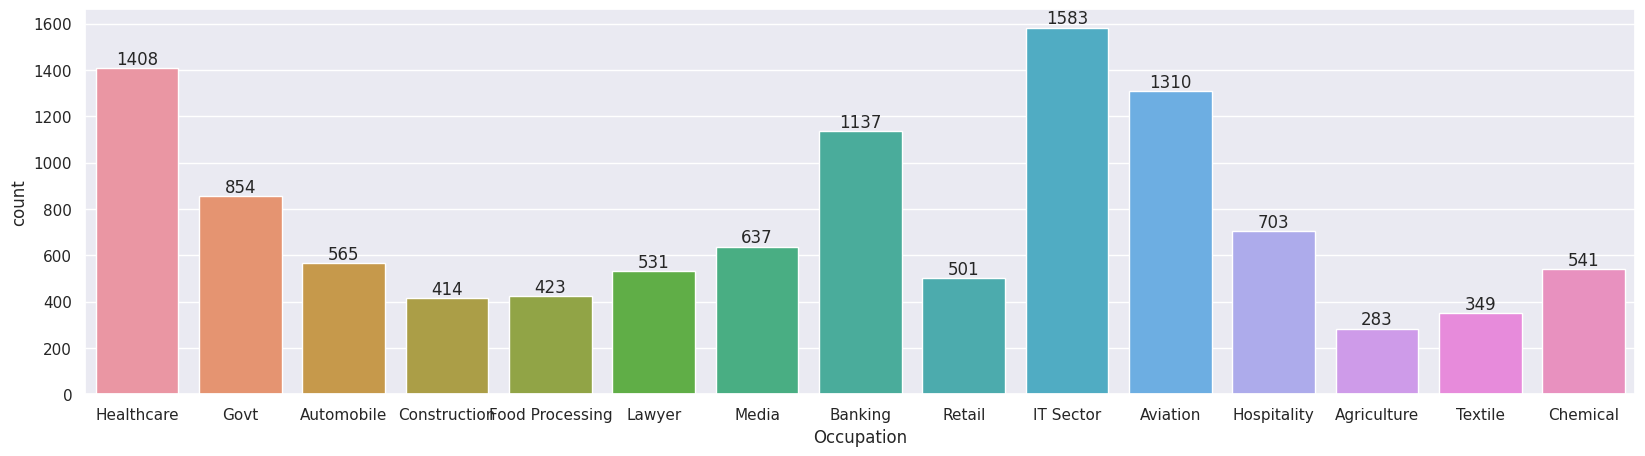

In [66]:
sns.set(rc={'figure.figsize':(20,5)})

ax= sns.countplot(data=df,x='Occupation')

for bars in ax.containers:
  ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

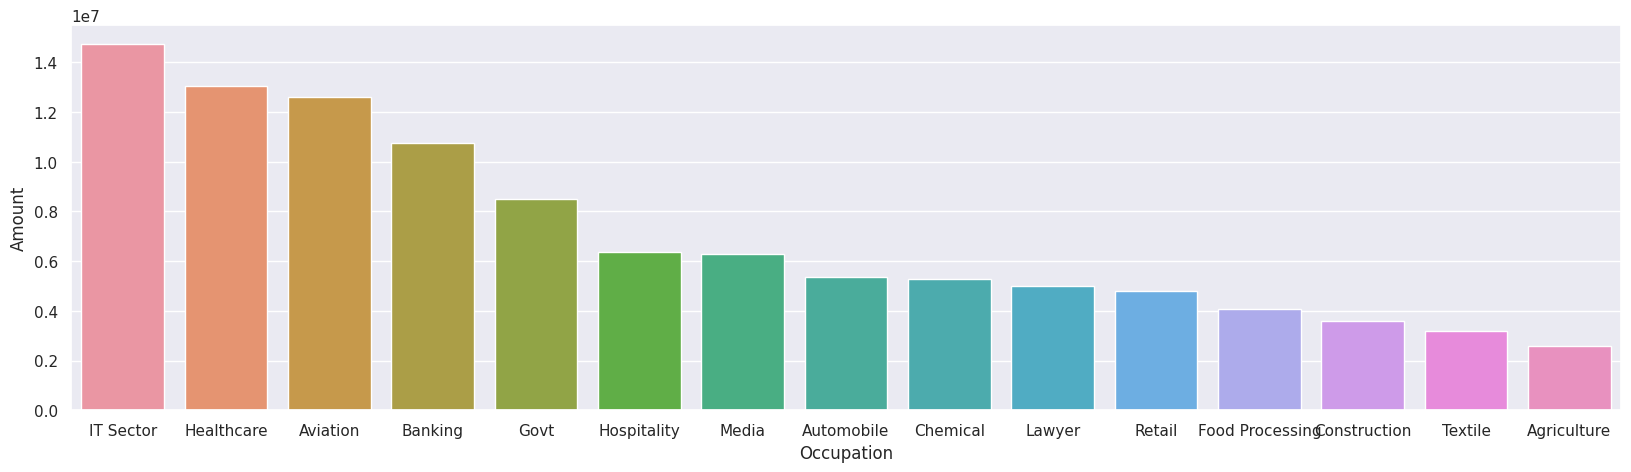

In [67]:
sales_states=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_states,x='Occupation',y='Amount')

*Most buyers are working in IT sector, healthcare sector and aviation.*

**Product Category**

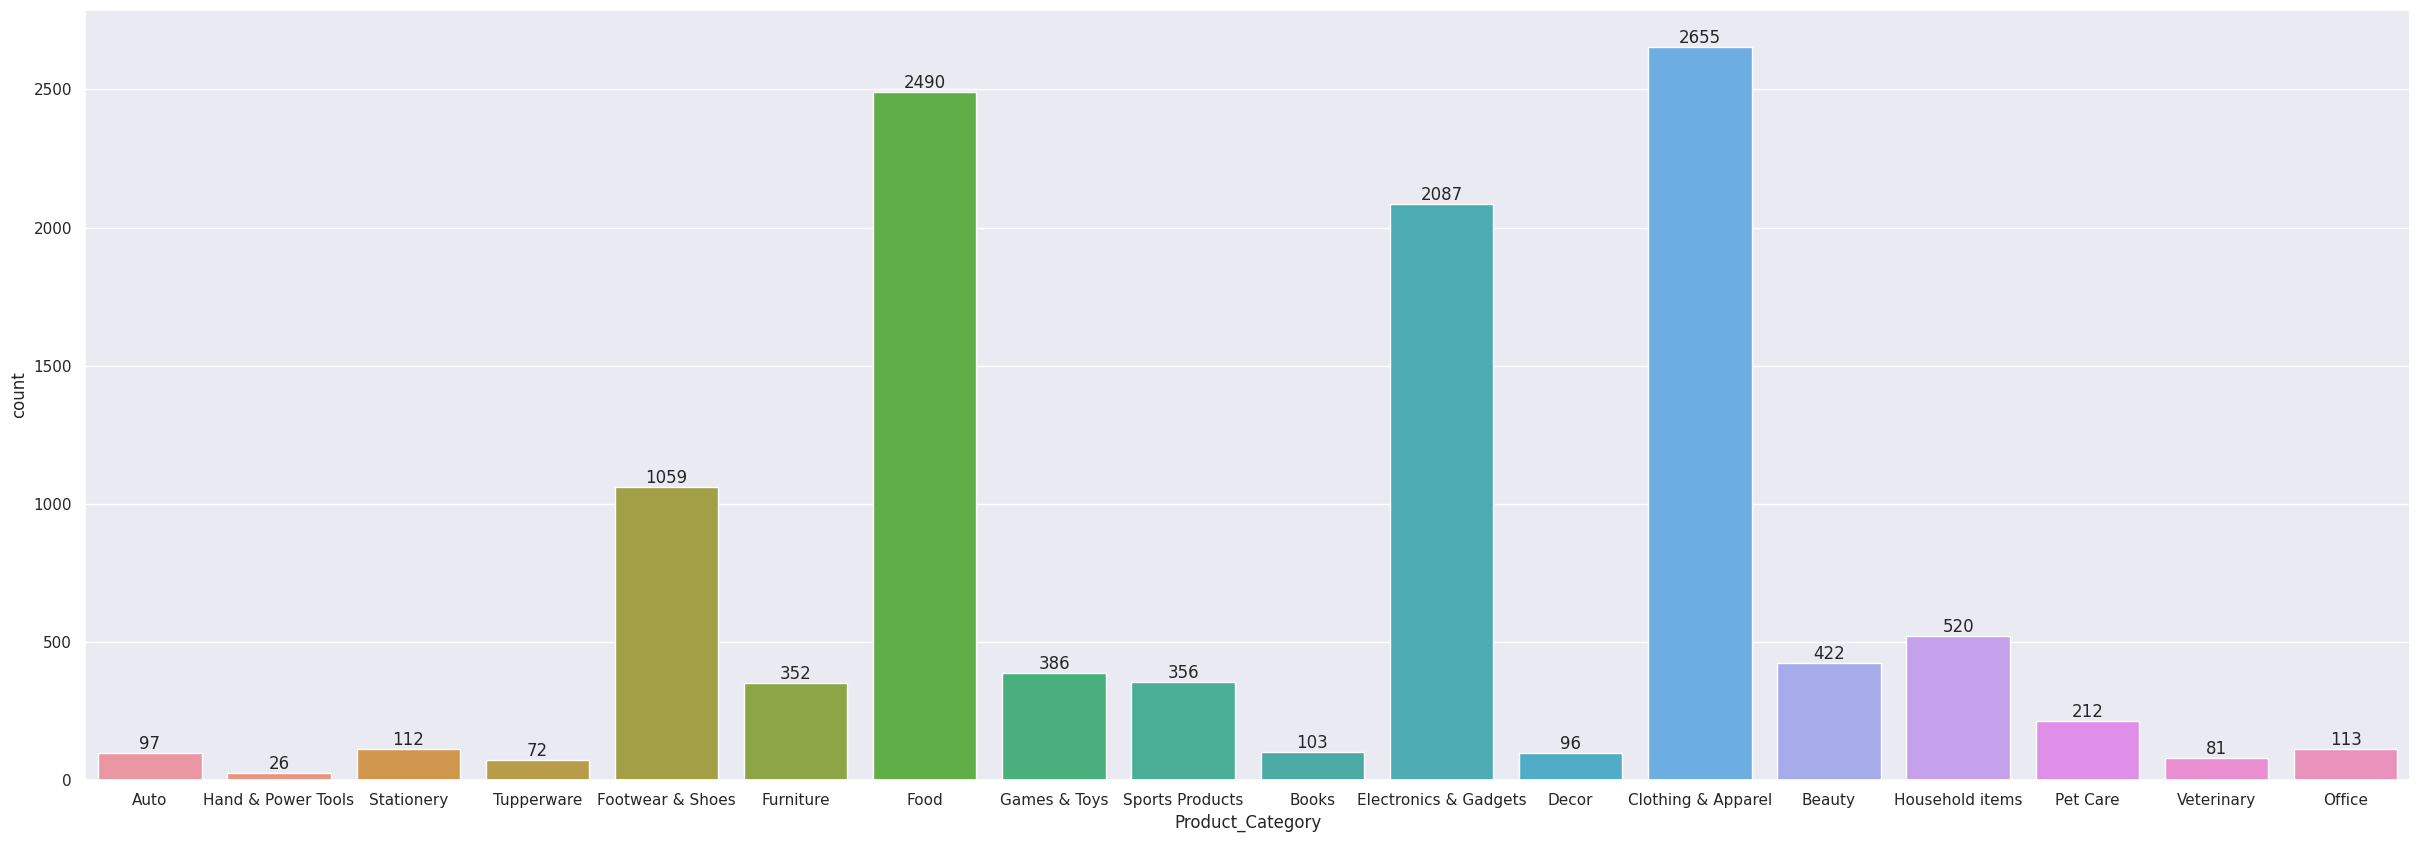

In [70]:
sns.set(rc={'figure.figsize':(30,10)})

ax= sns.countplot(data=df,x='Product_Category')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

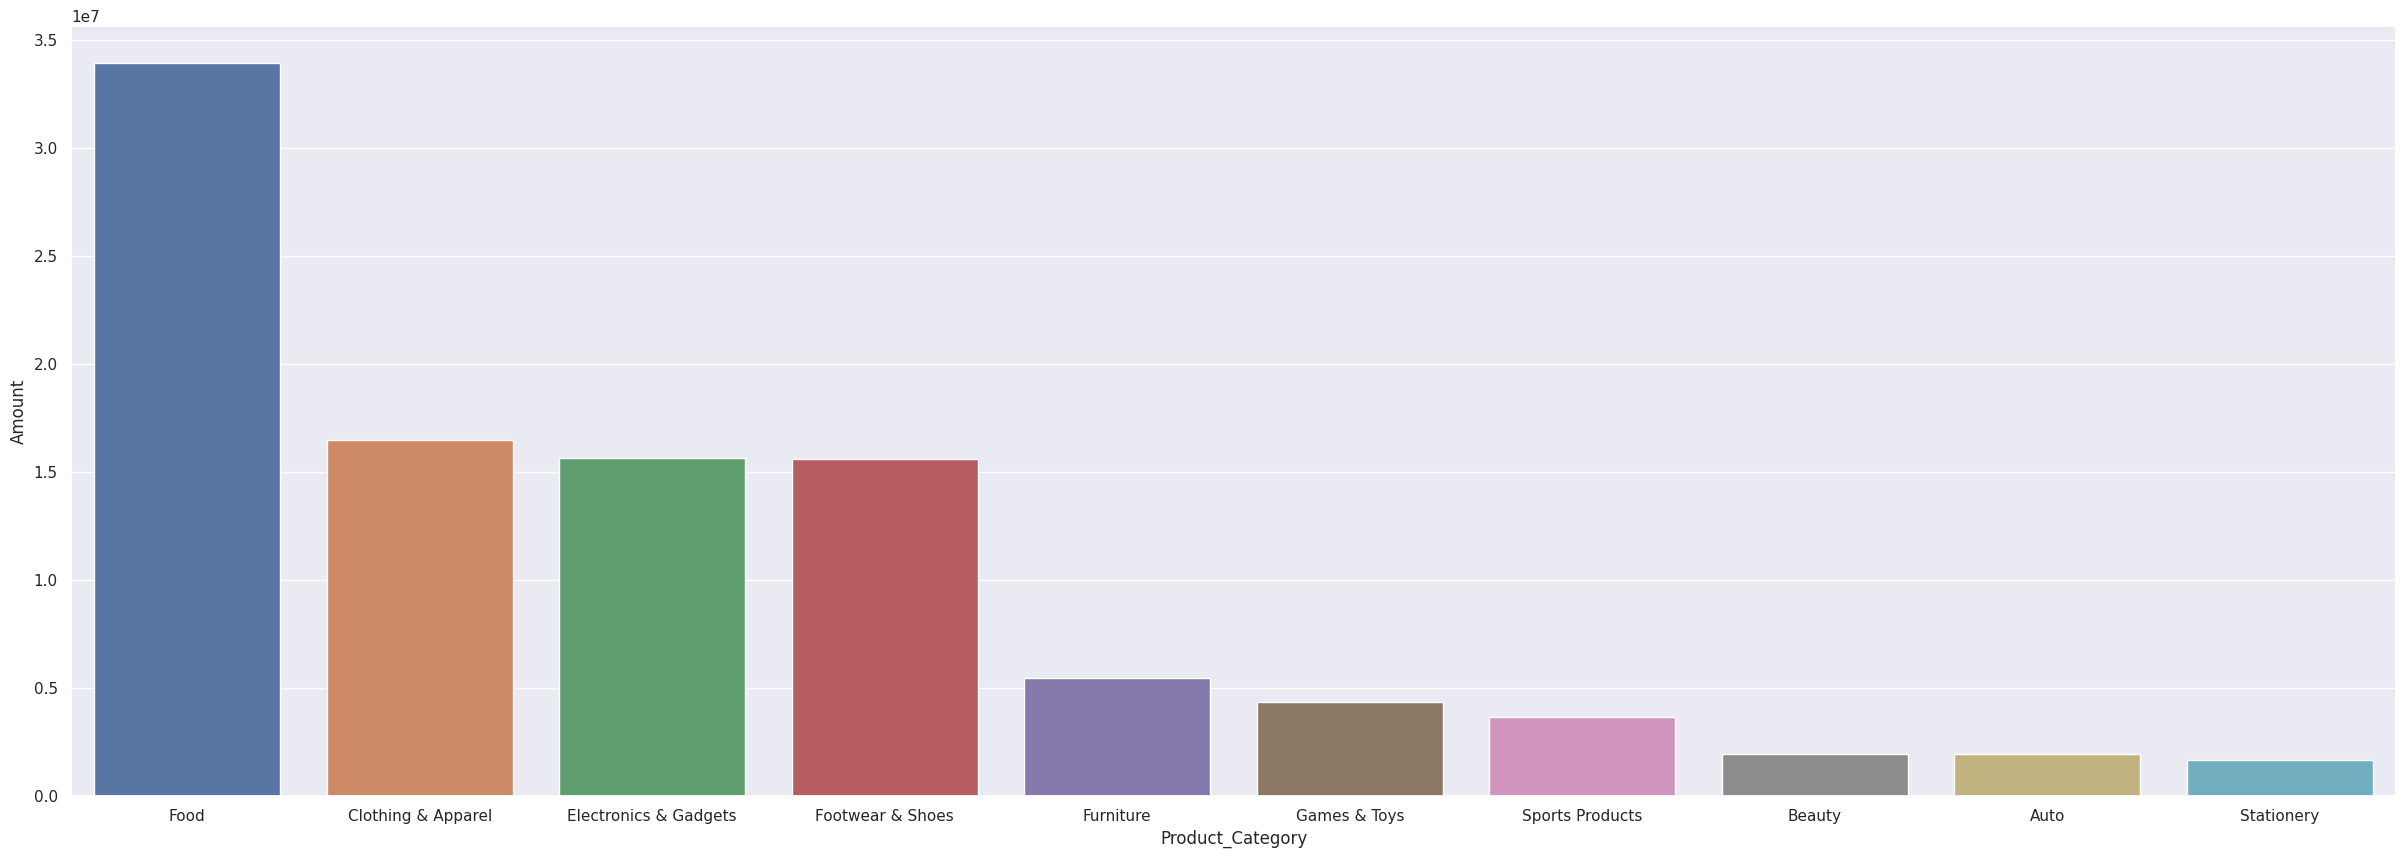

In [78]:
sales_states=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(data=sales_states,x='Product_Category',y='Amount')

*Most of the sold products are from Food, clothing & Apparel and electronics category.*

**Conclusion**

***Married Women between the age group 26-35 from UP, Maharashtra and Karnataka
 working in IT, Healthcare and aviation are more likely to buy products from food clothing and electronics category.***